Deepface 由 Facebook AI research group於 2015 年開源，是一套功能完整且易於上手的臉部識別/特徵分析Python framework，核心模型使用Tensorflow/Keras訓練，整合了多種目前業界流行的人臉識別模型，如VGG-Face、Google Facenet、ArcFace…等等。目前Facebook便是使用DeepFace，作為人員身份鑑別及反冒充使用。

Deepface是完全開源的程式碼，可以應用於個人及商業的環境並加以修改，且無任何侵權的疑慮。

In [ ]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 624.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=b9b9f0c26e09e9065db366d6eff627f3774802743f5262b9e0c3171add869a7e
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
pip install opencv-python

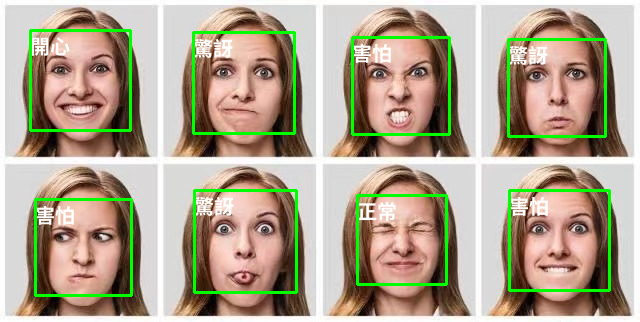

In [99]:
import cv2
from deepface import DeepFace
import numpy as np

from google.colab.patches import cv2_imshow

from PIL import Image
from IPython.display import display
# 定義該情緒的中文字
text_obj={
    'angry': '生氣',
    'disgust': '噁心',
    'fear': '害怕',
    'happy': '開心',
    'sad': '難過',
    'surprise': '驚訝',
    'neutral': '正常'
}

# 定義加入文字函式
def putText(x,y,text,size=20,color=(255,255,255)):
    global img

    font_path = "./NotoSansTC-Bold.ttf"  # Adjust the font path if needed
    font = ImageFont.truetype(font_path, size)

    imgPil = Image.fromarray(img)                  # 轉換成 PIL 影像物件
    draw = ImageDraw.Draw(imgPil)                  # 定義繪圖物件
    draw.text((x, y), text, fill=color, font=font) # 加入文字
    img = np.array(imgPil)                         # 轉換成 np.array

img = cv2.imread('1234.jpg')                    # 載入圖片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)       # 將圖片轉成灰階
face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")   # 載入人臉模型
faces = face_cascade.detectMultiScale(gray)        # 偵測人臉

for (x, y, w, h) in faces:
    # 擴大偵測範圍，避免無法辨識情緒
    x1 = x
    x2 = x+w
    y1 = y
    y2 = y+h
    face = img[y1:y2, x1:x2]  # 取出人臉範圍
    try:
        emotion_result  = DeepFace.analyze(face, actions=['emotion'],enforce_detection=False)  # 辨識情緒
        dominant_emotion = emotion_result[0]['dominant_emotion'] if emotion_result and 'dominant_emotion' in emotion_result[0] else None #避開錯誤，確保dominant_emotion一定回傳值

        if dominant_emotion:
            putText(x, y, text_obj[dominant_emotion])  # 放入文字
        else:
            print('Dominant emotion not found in the result.')

    except Exception as e:
        print(f'error : {e}')
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)    # 利用 for 迴圈，抓取每個人臉屬性，繪製方框

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()